The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['aeval1.bmp', 'kelvinl1.bmp', 'kelvinl3.bmp', 'kelvinr3.bmp', 'mazwanl1.bmp', 'mazwanl2.bmp', 'mazwanl3.bmp', 'mazwanl4.bmp', 'mazwanl5.bmp', 'mazwanr1.bmp', 'mazwanr2.bmp', 'mazwanr3.bmp', 'mazwanr4.bmp', 'mazwanr5.bmp', 'roslir2.bmp', 'ss.bmp', 'tanwnl3.bmp']


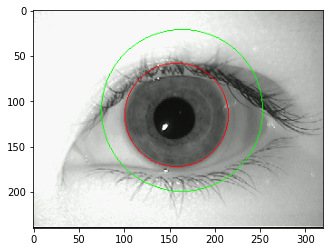

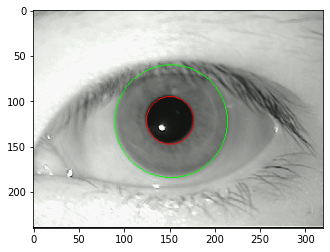

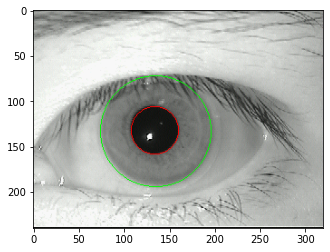

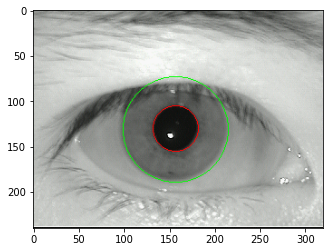

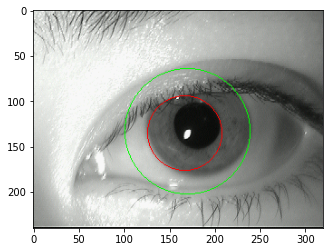

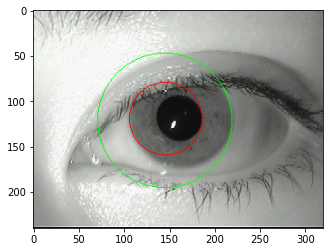

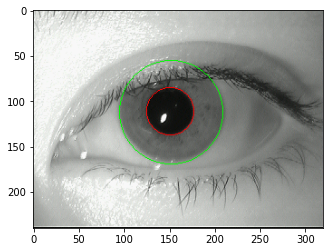

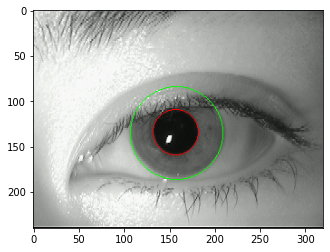

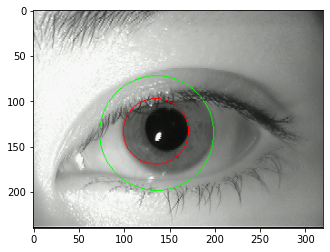

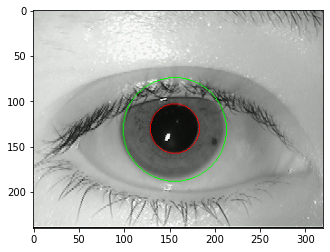

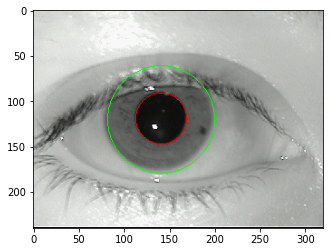

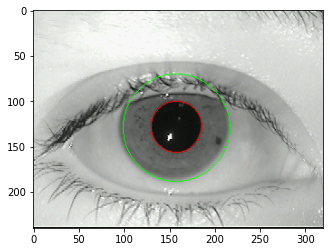

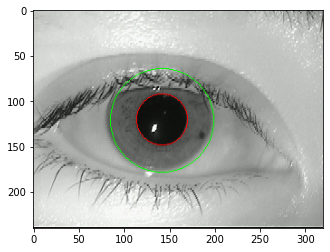

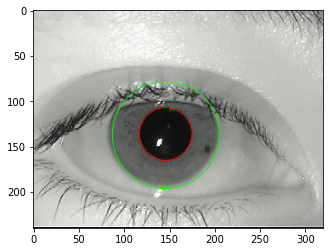

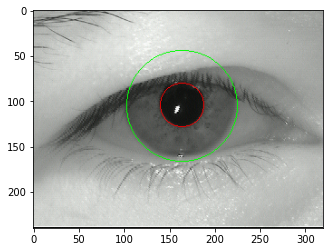

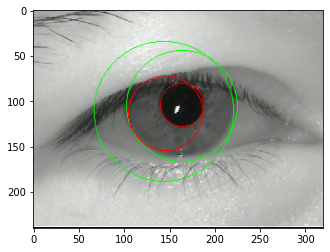

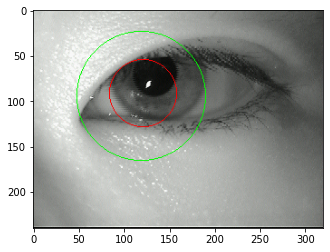

In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import canny_edge_detector as canny
from sobel import show_images
import matplotlib.pyplot as plt 
import skimage.io as io
import os
import numpy as np
paths=[]
def load_data(dir_name = 'images'):
        imgs = []
        print(os.listdir(dir_name))
        for filename in os.listdir(dir_name):
            paths.append(dir_name + '/' + filename)
        return paths
imgs = load_data('images')
IMG_PATH = 'images/kelvinl1.bmp'
for img in imgs:
    o_circles,inner_circles,im = canny.process_for_daugman(canny,img)
